## Combined Cycle Power Plant 
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators.
The Prediction task is to determine the Net Energy Generated (MW)

Linear Regression is implemented

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from tqdm import tqdm

In [2]:
data_frame = pd.read_excel("Folds5x2_pp.xlsx", sheet_name = 0)
dataset = np.array(data_frame)
np.random.shuffle(dataset)

split_index = int(0.7 * dataset.shape[0])

validation_index = split_index + int((dataset.shape[0] - split_index)/2)

train = dataset[:split_index,:]
N,p = train.shape
p = p
validation = dataset[split_index:validation_index,:]
Nv,pv = validation.shape
pv = pv
test = dataset[validation_index:,:]
Nt,pt = test.shape
pt = pt

X = train[:,:4]
X = np.hstack((np.ones((N,1)),X))
Y = train[:,-1].reshape(N,1)

Xv = validation[:,:4]
Xv = np.hstack((np.ones((Nv,1)),Xv))
Yv = validation[:,-1].reshape(Nv,1)

Xt = test[:,:4]
Xt = np.hstack((np.ones((Nt,1)),Xt))
Yt = test[:,-1].reshape(Nt,1)

In [3]:
quartileFeature_1 = np.quantile(X[:,1], [0.25, 0.5, 0.75])
quartileCutoffs_1 = np.array([(quartileFeature_1[0] - (1.5*(quartileFeature_1[2] - quartileFeature_1[0]))),(quartileFeature_1[2] + (1.5*(quartileFeature_1[2] - quartileFeature_1[0])))])
for i in range(N):
    if X[i,1] >= (quartileCutoffs_1[1]):
        X[i,1] = quartileCutoffs_1[1]
    if X[i,1] <= quartileCutoffs_1[0]:
        X[i,1] = quartileCutoffs_1[0]

quartileFeature_2 = np.quantile(X[:,2], [0.25, 0.5, 0.75])
quartileCutoffs_2 = np.array([(quartileFeature_2[0] - (1.5*(quartileFeature_2[2] - quartileFeature_2[0]))),(quartileFeature_2[2] + (1.5*(quartileFeature_2[2] - quartileFeature_2[0])))])
for i in range(N):
    if X[i,2] >= (quartileCutoffs_2[1]):
        X[i,2] = quartileCutoffs_2[1]
    if X[i,2] <= quartileCutoffs_2[0]:
        X[i,2] = quartileCutoffs_2[0]
        
quartileFeature_3 = np.quantile(X[:,3], [0.25, 0.5, 0.75])
quartileCutoffs_3 = np.array([(quartileFeature_3[0] - (1.5*(quartileFeature_3[2] - quartileFeature_3[0]))),(quartileFeature_3[2] + (1.5*(quartileFeature_3[2] - quartileFeature_3[0])))])
for i in range(N):
    if X[i,3] >= (quartileCutoffs_3[1]):
        X[i,3] = quartileCutoffs_3[1]
    if X[i,3] <= quartileCutoffs_3[0]:
        X[i,3] = quartileCutoffs_3[0]
        
quartileFeature_4 = np.quantile(X[:,4], [0.25, 0.5, 0.75])
quartileCutoffs_4 = np.array([(quartileFeature_4[0] - (1.5*(quartileFeature_4[2] - quartileFeature_4[0]))),(quartileFeature_4[2] + (1.5*(quartileFeature_4[2] - quartileFeature_4[0])))])
for i in range(N):
    if X[i,4] >= (quartileCutoffs_4[1]):
        X[i,4] = quartileCutoffs_4[1]
    if X[i,4] <= quartileCutoffs_4[0]:
        X[i,4] = quartileCutoffs_4[0]

In [4]:
# Standardization of All data
for i in range(1,p):
    mean_vals = np.mean(X[:,i])
    std_vals = np.std(X[:,i])
    X[:,i] = (X[:,i] - np.mean(X[:,i]))/np.std(X[:,i])
    Xv[:,i] = (Xv[:,i] - mean_vals)/std_vals
    Xt[:,i] = (Xt[:,i] - mean_vals)/std_vals

100%|██████████| 19000/19000 [00:01<00:00, 11201.54it/s]


Root Mean Square Costs
 Training Set Cost: 3.2429225547794487 
Validation Set Cost: 3.144578215400638


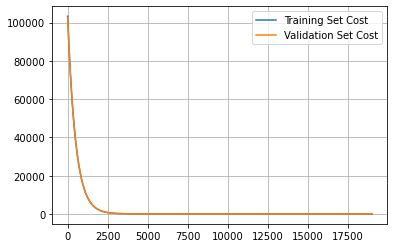

In [5]:
# Gradient Descent
iterations = 19000
alpha = 0.001

theta = np.random.randn(p,1)


y_pred = np.dot(X,theta)
costs = np.zeros((iterations,1))
costs_val = np.zeros((iterations,1))
J = 20
Jv = 20
f = 0
for i in tqdm(range(iterations)):
    y_pred = np.dot(X,theta)
    grad = np.dot(((y_pred - Y).T),X).T
    
    # Update Weights
    theta = theta - ((alpha/N) * grad)
    
    # Training Set Cost
    J = (1/(2*N)) * np.sum(np.sum(np.dot( (y_pred - Y).T,(y_pred - Y) ),axis = 0 ))  
    costs[i][0] = J
    
    # Validation Set Cost
    y_pred_val = np.dot(Xv,theta)
    Jv = (1/(2*Nv)) * np.sum(np.sum(np.dot( (y_pred_val - Yv).T,(y_pred_val - Yv) ),axis = 0 ))
    costs_val[i][0] = Jv
    
y_pred = np.dot(X,theta)
print("Root Mean Square Costs\n","Training Set Cost:",np.sqrt(J),"\nValidation Set Cost:",np.sqrt(Jv))
plt.plot(costs, label = "Training Set Cost")
plt.plot(costs_val, label = "Validation Set Cost")
plt.legend()
plt.grid()
plt.show()

Costs in the last 1000 epochs

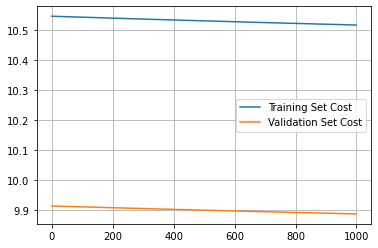

In [6]:
plt.plot(costs[-1000:], label = "Training Set Cost")
plt.plot(costs_val[-1000:], label = "Validation Set Cost")
plt.legend()
plt.grid()
plt.show()

### Prediction on Test Data

In [7]:
y_pred_test = np.dot(Xt,theta)
J_test = (1/(2*Nt)) * np.sum(np.sum(np.dot( (y_pred_test - Yt).T,(y_pred_test - Yt) ),axis = 0 ))
print("Root Mean Square Test Set Cost:",np.sqrt(J_test))

Root Mean Square Test Set Cost: 3.339696129325608


In [8]:
print("Model is having coefficients \t", theta)

Model is having coefficients 	 [[454.56754713]
 [-13.47150265]
 [ -3.85773416]
 [  0.59341934]
 [ -1.87164875]]


## Using Statsmodel

In [9]:
import statsmodels.api as sm

In [10]:
model_sm = sm.OLS(Y, X)
fitting = model_sm.fit()

print(fitting.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.164e+04
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:03:00   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.5675      0.056   8157.479      0.0